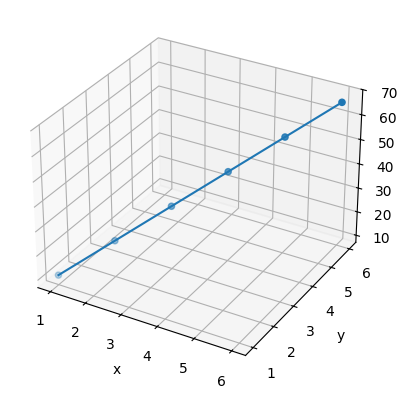

In [56]:
### 3D图像
### 散点图
import matplotlib.pyplot as plt
import numpy as np

## 3d图像必须导入3d坐标系
from mpl_toolkits.mplot3d import axes3d

plt.figure()
ax3d = plt.axes(projection='3d')

## 这里z为啥是二维?
## 比如
## X:
#  [1, 2, 3]
#  [4, 5, 6]
## Y:
#  [1, 2, 3]
#  [4, 5, 6]
##则XY组合形成的点阵,是个二维数组,记住,这是个二维点阵
# [(1,1), (2,2), (3,3)]
# [(4,4), (5,5), (6.6)]
##那么z值呢,必须要和点阵图形成1v1的映射,必然也是个二维数组
# [9,8,7]
# [6,5,4]
# 不要把它想成网格!!!
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[1, 2, 3], [4, 5, 6]])
z = np.array([[11, 22, 33], [44, 55, 66]])

## 也可以都是一维数组,(x,y,z)映射成点
# x = np.arange(10)
# y = np.arange(10)
# z = np.arange(10)

ax3d.scatter(x, y, z)
ax3d.plot(x, y, z)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')

plt.show()


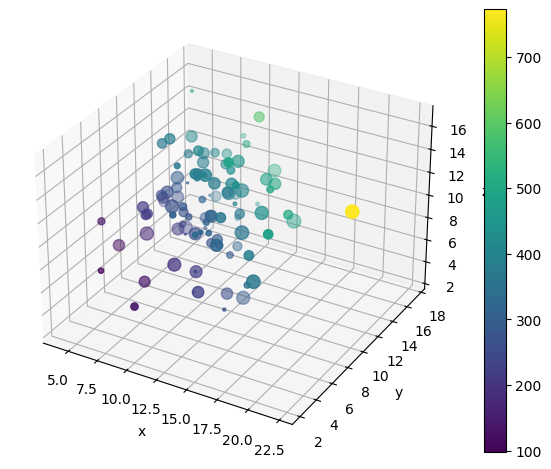

In [55]:
from mpl_toolkits.mplot3d import axes3d
# x= np.random.randint(1, 100, size=(10, 10))
# y= np.random.randint(1, 100, size=(10, 10))
# z = np.random.randint(1, 100, size=(10, 10))

x = np.random.normal(10, 3, size=(10, 10))
y = np.random.normal(10, 3, size=(10, 10))
z = np.random.normal(10, 3, size=(10, 10))

## 一维数组也是可以的
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)
# z = np.random.normal(0, 1, 100)

# c = np.random.randint(1, 100, size=(10, 10))
s = np.random.randint(1, 100, size=(10, 10))
c = x**2 + y**2 + z**2

fig = plt.figure()
## 获取3维坐标系的方法
## 方法1:直接创建
ax3d = plt.axes(projection='3d')
## 方法2:fig添加,需要矩阵 [x,y,width,height]
# ax3d = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')
## 方法3
# ax3d = fig.add_subplot(111, projection='3d')
## 方法4
# ax3d = plt.subplot(111, projection='3d')
im = ax3d.scatter(
    x,
    y,
    z,
    s = s,
    # marker='*',
    # color='r',
    c = c,
    cmap = 'viridis',
)
## 这里传入im才能运行,3d图和2d不一样
plt.colorbar(im)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')


plt.tight_layout()
plt.show()


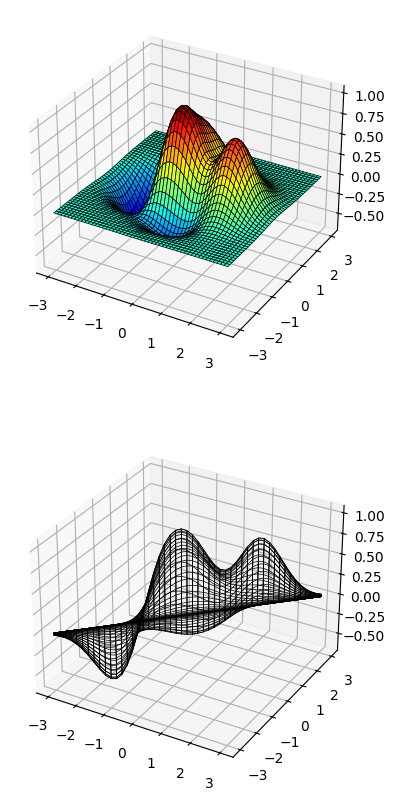

In [69]:
## 绘制3d曲面

n = 50
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
## 说一下meshgrid的作用,其实就是将x,y的坐标生成网格矩阵
## 也就是: x会沿着y轴方向复制len(y)个, y会沿着x轴方向复制len(x)个
## 所以x,y的每个坐标点组合起来就是整个网格的坐标(x,y)
m, n = np.meshgrid(x, y) ## 复制了就会变成2维数组
z = (1 -m/2 + m**5 + n**3) * np.exp(-m**2 - n**2)

fig = plt.figure(figsize=(10, 10))
ax3d = fig.add_subplot(211, projection='3d')

### ps
### 设计初衷：plot_surface 期望 X、Y 和 Z 是二维数组，直接反映曲面上的每个点的坐标和高度。
### 一维输入的假设：虽然理论上 Matplotlib 可以处理一维输入并扩展为二维网格，但 plot_surface 的实现更严格，要求用户明确提供二维数据。
### 与其他函数的区别：相比之下，contour 对一维输入的处理更宽松，而 plot_surface 需要更精确的形状匹配。
###
### 因此,全部采用二维数组,没那么多屁事
ax3d.plot_surface(
    m,
    n,
    z,
    rstride=1, ##行步长,控制曲面网格的采样步长。步长越大，网格越稀疏，性能更高但细节减少
    cstride=1, ##列步长
    cmap='jet',
    antialiased=True, ## 抗锯齿
    shade=True, ## 阴影效果
    linewidth=0.5, edgecolor='k', ## 网格线
)


## 线框图
ax3d_2 = fig.add_subplot(212, projection='3d')
ax3d_2.plot_wireframe(x, y, z, rstride=1, cstride=1, antialiased=True,
                    linewidth=0.5, edgecolor='k', cmap='jet'
                    )

plt.show()



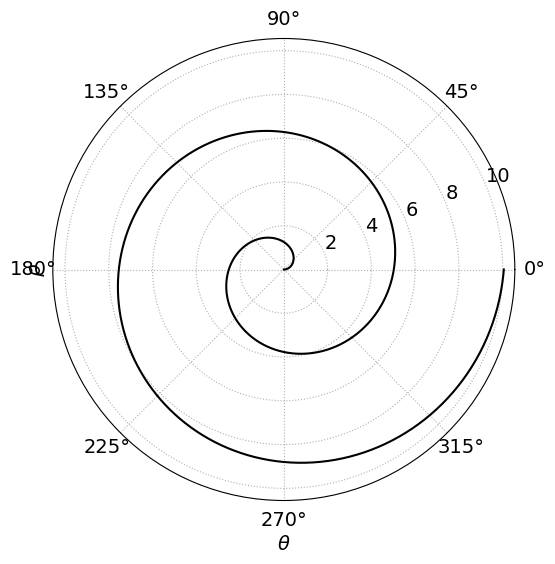

In [78]:
### 极坐标系
## 雷达
plt.figure('Polar', figsize=(6, 6))
plt.axes(projection='polar') ## 设置极坐标系。和设置3d坐标系的方法是一样的,参数不一样
plt.tick_params(labelsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\rho$', fontsize=14)
plt.grid(True, linestyle=':')

t = np.linspace(0, 4 * np.pi, 1000) ## 极角
r = 0.8 * t ## 极径
plt.plot(t, r, 'k')
plt.show()


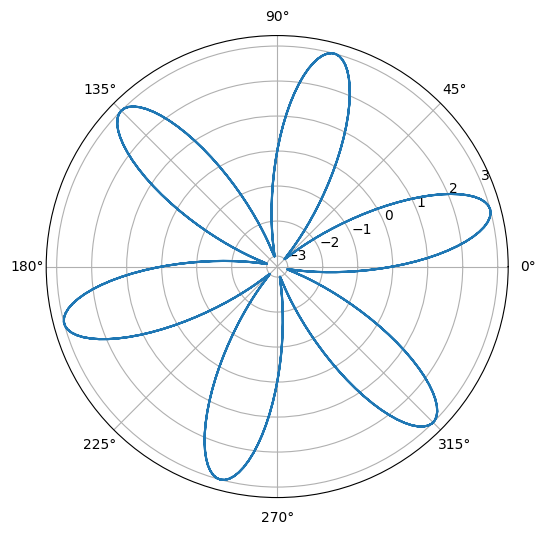

In [80]:
x = np.linspace(0, 6 * np.pi, 1000)
y = 3 * np.sin(6*x)

plt.figure(figsize=(6, 6))
plt.axes(projection='polar')
plt.plot(x, y)
plt.show()

In [105]:
### 简单动画
import matplotlib.animation as am

## 动画具体看matplotlib_anim.py文件

## 更新函数
def update(number):
    print('number', number)

## 每隔10ms执行一次update更新函数, 作用于plt.gcf()当前窗口对象
## plt.gcf() 获取当前窗口 -- getCurrentFigure和 gca不一样,getCurrentAxes()
## update: 更新函数
## frames: 桢数量
## interval: 间隔时间
anim = am.FuncAnimation(plt.gcf(), update, interval=10, frames=100)
plt.show()


In [106]:
### 算了,jupyter显示不了,直接写python文件吧
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 设置 3D 画布
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 初始数据
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 初始曲面
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 更新函数
def update(frame):
    ax.clear()  # 清除上一帧
    Z = np.sin(np.sqrt(X**2 + Y**2) + frame * 0.1)  # 更新 Z 数据
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')  # 重绘曲面
    ax.set_zlim(-1.5, 1.5)  # 固定 z 轴范围
    return surf,

# 创建动画
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=False)
plt.show()

<IPython.core.display.Javascript object>

在 Matplotlib 中，`plt`（即 `matplotlib.pyplot`）本身无法直接创建 3D 坐标系，因为 3D 绘图需要使用 `mpl_toolkits.mplot3d` 模块中的 `Axes3D` 类。要获取 3D 坐标系，通常需要结合 `plt.figure()` 和 `add_subplot()` 或 `subplot()`，并指定 `projection='3d'` 参数。以下通过表格和详细说明介绍如何使用 `plt` 获取 3D 坐标系，以及基本用法。

---

### 表格：获取 3D 坐标系的主要方法
| **方法**                  | **功能**                                  | **示例**                                      |
|---------------------------|-------------------------------------------|-----------------------------------------------|
| `plt.subplot(..., projection='3d')` | 创建带有 3D 坐标系的子图                  | `ax = plt.subplot(111, projection='3d')`     |
| `fig.add_subplot(..., projection='3d')` | 在 Figure 上添加 3D 子图                  | `ax = fig.add_subplot(111, projection='3d')` |
| `plt.figure().add_axes(..., projection='3d')` | 手动添加 3D 坐标系                        | `ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')` |

---

### 详细说明

#### 1. **基本步骤**
- **导入模块**：需要导入 `matplotlib.pyplot` 和 `mpl_toolkits.mplot3d`。
- **创建 3D 坐标系**：通过 `projection='3d'` 参数生成 `Axes3D` 对象。
- **绘制 3D 图**：在 `Axes3D` 上使用方法如 `plot()`, `scatter()`, `plot_surface()` 等。

#### 2. **使用 `plt.subplot()`**
- **用法**：直接通过 `plt.subplot()` 创建 3D 子图。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np

  # 创建 3D 坐标系
  ax = plt.subplot(111, projection='3d')

  # 生成数据
  t = np.linspace(0, 10, 100)
  x = np.sin(t)
  y = np.cos(t)
  z = t

  # 绘制 3D 曲线
  ax.plot(x, y, z, label='螺旋线')
  ax.set_xlabel('X 轴')
  ax.set_ylabel('Y 轴')
  ax.set_zlabel('Z 轴')
  ax.legend()

  plt.show()
  ```
  - **效果**：显示一个 3D 螺旋线，带有 X、Y、Z 轴标签和图例。

#### 3. **使用 `fig.add_subplot()`**
- **用法**：先创建 `Figure` 对象，再添加 3D 子图，适合多子图场景。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # 生成散点数据
  x = np.random.rand(50)
  y = np.random.rand(50)
  z = np.random.rand(50)

  # 绘制 3D 散点图
  ax.scatter(x, y, z, color='red', label='随机点')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend()

  plt.show()
  ```
  - **效果**：显示 50 个随机分布的 3D 散点。

#### 4. **使用 `add_axes()`**
- **用法**：手动指定 3D 坐标系的位置和大小。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np

  fig = plt.figure()
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

  # 生成表面数据
  X = np.arange(-5, 5, 0.25)
  Y = np.arange(-5, 5, 0.25)
  X, Y = np.meshgrid(X, Y)
  Z = np.sin(np.sqrt(X**2 + Y**2))

  # 绘制 3D 表面
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('X 轴')
  ax.set_ylabel('Y 轴')
  ax.set_zlabel('Z 轴')

  plt.show()
  ```
  - **效果**：显示一个 3D 表面图，使用 `viridis` 颜色映射。

#### 5. **常用 3D 绘图方法**
- **`ax.plot(x, y, z)`**：绘制 3D 折线。
- **`ax.scatter(x, y, z)`**：绘制 3D 散点。
- **`ax.plot_surface(X, Y, Z)`**：绘制 3D 表面。
- **`ax.contour(X, Y, Z)`**：绘制 3D 等高线。

#### 6. **坐标轴设置**
- **`set_xlabel()`、`set_ylabel()`、`set_zlabel()`**：设置轴标签。
- **`set_xlim()`、`set_ylim()`、`set_zlim()`**：设置轴范围。
- **示例**：
  ```python
  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  ax.set_zlim(0, 10)
  ```

---

### 注意事项
1. **模块导入**：
   - 必须导入 `mpl_toolkits.mplot3d`，否则 `projection='3d'` 会报错。
2. **数据维度**：
   - 折线和散点需要一维数组 `(x, y, z)`。
   - 表面图需要二维网格数据 `(X, Y, Z)`。
3. **交互性**：
   - 在 Jupyter Notebook 中，添加 `%matplotlib notebook` 可启用交互旋转。
4. **与 2D 区别**：
   - 3D 坐标系通过 `Axes3D` 对象操作，不能直接用 2D 方法如 `plt.plot()`。

---

### 综合示例
```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 6))

# 子图 1：3D 散点
ax1 = fig.add_subplot(121, projection='3d')
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)
ax1.scatter(x, y, z, c='b', label='散点')
ax1.set_title('3D 散点图')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# 子图 2：3D 表面
ax2 = fig.add_subplot(122, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
ax2.plot_surface(X, Y, Z, cmap='plasma')
ax2.set_title('3D 表面图')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()
```
- **效果**：左右两个子图，一个显示 3D 散点，一个显示 3D 表面。

---

### 总结
- **获取 3D 坐标系**：使用 `plt.subplot()` 或 `fig.add_subplot()`，设置 `projection='3d'`。
- **绘图类型**：支持折线、散点、表面等多种 3D 图。
- **自定义**：通过 `set_xlabel()` 等调整轴标签和范围。

如果你有具体的 3D 绘图需求（比如“绘制 3D 球面”），可以告诉我，我帮你写代码！

你想了解如何使用 `matplotlib.pyplot`（简称 `plt`）创建动画。Matplotlib 提供了强大的动画功能，主要通过 `matplotlib.animation` 模块实现。以下我会详细讲解如何用 `plt` 创建动画，包括基本步骤、示例代码，以及一些实用技巧。

---

### 基本概念
Matplotlib 的动画通常基于以下两种工具：
1. **`FuncAnimation`**：最常用的动画类，通过反复调用一个函数来更新图表。
2. **`ArtistAnimation`**：基于预定义的艺术家（Artist）序列播放动画。

我们会以 `FuncAnimation` 为例，因为它更灵活，适用于动态更新数据的情况，比如你之前的 3D 曲面图场景。

---

### 创建动画的基本步骤
1. **导入必要的模块**：
   - `matplotlib.pyplot` 用于绘图。
   - `matplotlib.animation` 用于动画。

2. **准备数据**：
   - 定义初始数据和更新规则。

3. **设置图表**：
   - 创建 `Figure` 和 `Axes`（如果是 3D 图，使用 `projection='3d'`）。

4. **定义更新函数**：
   - 告诉 Matplotlib 如何在每一帧更新图表。

5. **调用 `FuncAnimation`**：
   - 设置动画参数（如帧数、间隔时间）。

6. **显示或保存动画**：
   - 用 `plt.show()` 显示，或用 `save()` 保存为视频文件。

---

### 示例 1：简单的 2D 动画
先从一个简单的 2D 折线图动画开始，展示基础用法。

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 设置画布
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
line, = ax.plot(x, np.sin(x))  # 初始折线图

# 更新函数
def update(frame):
    line.set_ydata(np.sin(x + frame * 0.1))  # 更新 y 数据
    return line,

# 创建动画
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

plt.show()
```

#### 解释
- **`frames=100`**：动画有 100 帧。
- **`interval=50`**：每帧间隔 50 毫秒（即 20 帧/秒）。
- **`blit=True`**：优化性能，只重绘变化的部分。
- **效果**：你会看到一条正弦波在水平方向上动态移动。

---

### 示例 2：3D 曲面动画
结合你之前的问题，我用 `plot_surface` 创建一个 3D 曲面动画，展示曲面随时间变化。

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 设置 3D 画布
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 初始数据
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 初始曲面
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 更新函数
def update(frame):
    ax.clear()  # 清除上一帧
    Z = np.sin(np.sqrt(X**2 + Y**2) + frame * 0.1)  # 更新 Z 数据
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')  # 重绘曲面
    ax.set_zlim(-1.5, 1.5)  # 固定 z 轴范围
    return surf,

# 创建动画
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=False)

plt.show()
```

#### 解释
- **`ax.clear()`**：每次更新时清除之前的曲面，因为 3D 图不像 2D 线条可以直接修改数据。
- **`blit=False`**：3D 动画通常不支持 `blit`，因为整个曲面需要重绘。
- **效果**：你会看到一个波动的 3D 曲面，像是正弦波在时间维度上传播。

---

### 保存动画
如果想保存为视频文件（如 MP4 或 GIF），需要安装 `ffmpeg` 或 `ImageMagick`，然后使用 `save` 方法。

#### 安装 ffmpeg
- Windows/Mac：下载安装 ffmpeg（https://ffmpeg.org/）。
- Linux：`sudo apt install ffmpeg`。

#### 保存代码
在 `plt.show()` 前添加：
```python
ani.save('surface_animation.mp4', writer='ffmpeg', fps=20)
```
或保存为 GIF：
```python
ani.save('surface_animation.gif', writer='pillow', fps=20)
```

---

### 重要参数（`FuncAnimation`）
- **`fig`**：要动画的 Figure 对象。
- **`func`**：更新函数（如 `update`），接收 `frames` 参数。
- **`frames`**：帧数，可以是整数（表示帧数）或可迭代对象（每一帧的值）。
- **`interval`**：帧之间的延迟（毫秒）。
- **`blit`**：是否只重绘变化部分（2D 动画推荐开启，3D 通常关闭）。
- **`repeat`**：动画是否循环（默认 `True`）。

---

### 优化与注意事项
1. **性能**：
   - 数据点过多时，动画可能变慢。可以用 `rstride` 和 `cstride` 降低 `plot_surface` 的分辨率：
     ```python
     surf = ax.plot_surface(X, Y, Z, cmap='viridis', rstride=2, cstride=2)
     ```

2. **3D 动画限制**：
   - 3D 图不像 2D 图那样可以直接修改数据（例如 `set_data`），通常需要清除并重绘。

3. **交互性**：
   - 如果在 Jupyter Notebook 中运行，需添加 `%matplotlib notebook` 或用 `HTML` 显示：
     ```python
     from IPython.display import HTML
     HTML(ani.to_jshtml())
     ```

---

### 扩展：动态更新 X/Y
如果想让网格本身也随时间变化（例如扭曲网格），可以更新 `X` 和 `Y`：
```python
def update(frame):
    ax.clear()
    X_new = X + 0.1 * np.sin(Y + frame * 0.1)  # 动态扭曲 X
    Z = np.sin(np.sqrt(X_new**2 + Y**2))
    surf = ax.plot_surface(X_new, Y, Z, cmap='viridis')
    ax.set_zlim(-1.5, 1.5)
    return surf,
```

---

### 总结
- **`plt` 与动画**：`plt` 提供画布和基础绘图功能，动画通过 `animation` 模块扩展实现。
- **2D vs 3D**：2D 动画可以用 `set_data` 高效更新，3D 动画通常需要重绘。
- **灵活性**：通过调整 `update` 函数，你可以实现几乎任何动态效果。

如果你有具体的需求（例如特定的动画效果或数据），可以告诉我，我帮你定制代码！